# Imports and setup

In [1]:
from KDEpy import KDE

In [2]:
from scipy.stats import norm, lognorm
from functools import reduce
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
np.random.seed(123)

# Synthetic data sets

In [4]:
# Data from https://projecteuclid.org/download/pdfview_1/euclid.aos/1281964340
N = norm
datasets = [[(0.5, N(loc=0, scale=(1/10))), (0.5, N(loc=5, scale=1))],
            [(0.5, N(loc=0, scale=1))] + [(1/10, N(loc=(k/2 - 1), scale=1/10)) for k in range(5)],
            [(1/8, N(loc=3*((2/3)**k - 1), scale=(2/3)**(k))) for k in range(8)],
            [(49/100, N(loc=-1, scale=(2/3))), (49/100, N(loc=1, scale=(2/3)))]
            + [(1/350, N(loc=(k-3)/2, scale=(1/100))) for k in range(7)],
            [(2/7, N(loc=(12*k - 15)/7, scale=(2/7))) for k in range(3)] +
            [(1/21, N(loc=(2*k)/7, scale=(1/21))) for k in range(8, 11)],
            [(46/100, N(loc=(2*k - 1), scale=(2/3))) for k in range(2)] +
            [(1/300, N(loc=-(k/2), scale=(1/100))) for k in range(1, 4)] +
            [(7/300, N(loc=(k/2), scale=(7/100))) for k in range(1, 4)],
            [(0.5, N(loc=-2, scale=(1/2))), (0.5, N(loc=2, scale=0.5))],
            [(3/4, N(loc=0, scale=1)), (1/4, N(loc=3/2, scale=1/3))],
            [(1, lognorm(loc=0, scale=1, s=1))],
            [(0.5, N(loc=0, scale=1))] +
            [(2**(1-k)/31, N(loc=(k + 0.5), scale=(2**(-k)/10))) for k in range(-2, 3)]]

# The sum of the fractions equal 1 in every dataset
assert np.all([np.allclose(sum([frac for (frac, d) in data]), 1) for data in datasets])

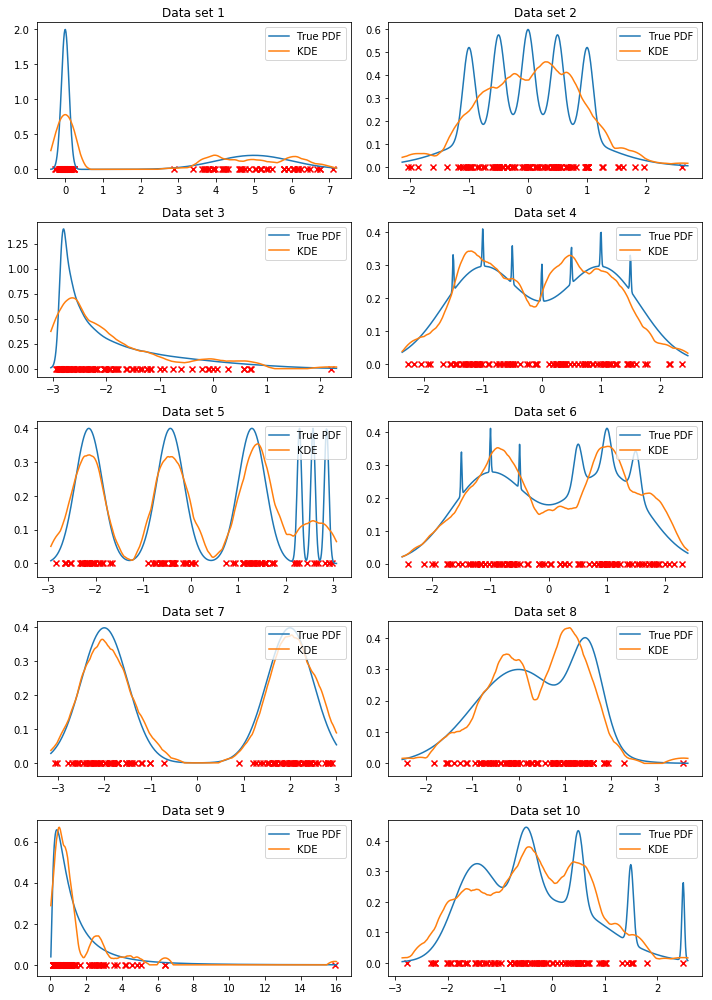

In [5]:
# Number of points
n = 100

plt.figure(figsize = (10, 14))
for i, data in enumerate(datasets, 1):
    
    # Sample the PDFs, then get x and y for true values
    samples = np.concatenate(tuple(d.rvs(int(n*frac)) for frac, d in data), axis = 0)
    x = np.linspace(np.min(samples)-0.1, np.max(samples)+0.1, num=2**9)
    y_true = reduce(np.add, (frac * d.pdf(x) for frac, d in data))
    y_kde = KDE('epa', bw = 0.2).fit(samples).evaluate_sorted(x)
    
    plt.subplot(5, 2, i)
    plt.title(f'Data set {i}')
    plt.scatter(samples, np.zeros_like(samples), marker='x', color='red')
    plt.plot(x, y_true, label='True PDF')
    plt.plot(x, y_kde, label='KDE')
    plt.legend(loc='upper right')
    plt.tight_layout()
      
plt.show()

-------------

# Cross validation

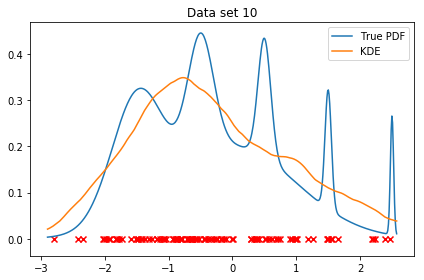

In [6]:
data = datasets[-1]
np.random.seed(123)
n = 100

# Sample the PDFs, then get x and y for true values
samples = np.concatenate(tuple(d.rvs(int(n*frac)) for frac, d in data), axis = 0)
x = np.linspace(np.min(samples)-0.1, np.max(samples)+0.1, num=2**9)
y_true = reduce(np.add, (frac * d.pdf(x) for frac, d in data))
kde = KDE('epa', bw = 0.4).fit(samples)
y_kde = kde.evaluate_sorted(x)


plt.title(f'Data set {i}')
plt.scatter(samples, np.zeros_like(samples), marker='x', color='red')
plt.plot(x, y_true, label='True PDF')
plt.plot(x, y_kde, label='KDE')
plt.legend(loc='upper right')
plt.tight_layout()

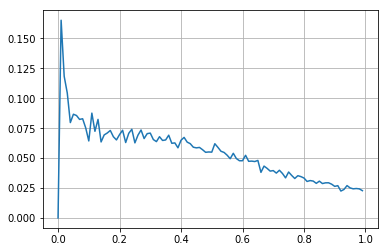

In [7]:
good, bws = [], []
for bw in range(100):
    bw = (bw + 0.000000001) / 100
    kde = KDE('epa', bw = bw).fit(samples)
    more_samples = np.concatenate(tuple(d.rvs(int(n*frac)) for frac, d in data), axis = 0)
    goodness = kde.evaluate_sorted(more_samples)**2

    #print(bw, np.mean(goodness))
    
    good.append(np.mean(goodness))
    bws.append(bw)
    
    
    
    
plt.plot(bws, good)
plt.grid(True)

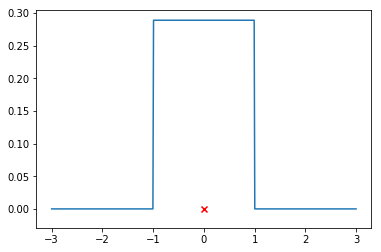

In [8]:
np.random.seed(123)
data =  np.array([0])

x = np.linspace(-3, 3, num=500)
y_kde = KDE('box', bw = 1).fit(data).evaluate_sorted(x)

plt.scatter(data, np.zeros_like(data), marker='x', color='red')
plt.plot(x, y_kde, label='KDE')

(-1, 1)

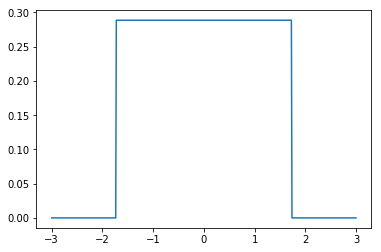

In [9]:
g = KDE._available_kernels['box']
plt.plot(x, g(x, bw = 1))
g.support

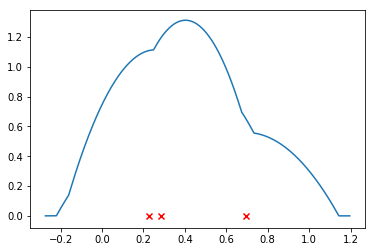

In [10]:
np.random.seed(123)
data = np.random.random(3)

x = np.linspace(data.min()-0.5, data.max()+0.5, num=500)
y_kde = KDE('epa', bw = 0.2).fit(data).evaluate_sorted(x)

plt.scatter(data, np.zeros_like(data), marker='x', color='red')
plt.plot(x, y_kde, label='KDE')

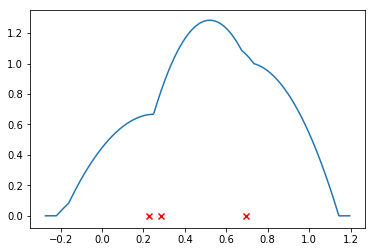

In [11]:
y_kde = KDE('epa', bw = 0.2).fit(data).evaluate_sorted(x, weights=[3, 1, 1])
plt.scatter(data, np.zeros_like(data), marker='x', color='red')
plt.plot(x, y_kde, label='KDE')

In [12]:
%load_ext autoreload

In [13]:
%autoreload 2

In [14]:
from KDEpy import KDE
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(123)

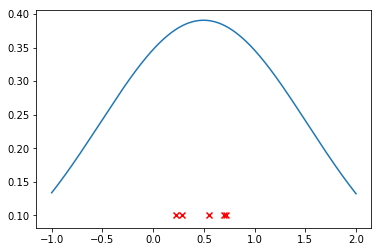

In [15]:
import KDEpy


np.random.seed(123)
data = np.random.rand(5)

kde = KDE(kernel = 'gaussian', bw = 1)
kde.fit(data)
x = np.linspace(-1, 2, num=500)
y = kde.evaluate_sorted(x)

plt.plot(x, y)
plt.scatter(data, np.zeros_like(data) + 0.1, marker='x', color='red')
plt.show()

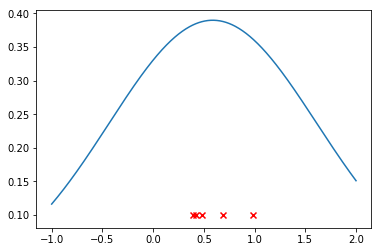

In [16]:
data = np.random.rand(5)

kde = KDEpy.KDE(kernel = 'gaussian', bw = 1)
kde.fit(data)
x = np.linspace(-1, 2, num=500)
y = kde.evaluate_sorted(x)

plt.plot(x, y)
plt.scatter(data, np.zeros_like(data) + 0.1, marker='x', color='red')
plt.show()

In [17]:
y

array([0.11643029, 0.1175009 , 0.11857721, 0.11965919, 0.12074681,
       0.12184006, 0.12293891, 0.12404333, 0.12515329, 0.12626877,
       0.12738973, 0.12851615, 0.12964799, 0.13078524, 0.13192784,
       0.13307577, 0.134229  , 0.13538749, 0.1365512 , 0.1377201 ,
       0.13889415, 0.14007332, 0.14125756, 0.14244683, 0.14364109,
       0.14484031, 0.14604443, 0.14725342, 0.14846723, 0.14968581,
       0.15090913, 0.15213712, 0.15336976, 0.15460698, 0.15584873,
       0.15709497, 0.15834565, 0.15960071, 0.1608601 , 0.16212377,
       0.16339166, 0.16466372, 0.16593988, 0.1672201 , 0.16850432,
       0.16979247, 0.17108449, 0.17238033, 0.17367992, 0.17498321,
       0.17629012, 0.1776006 , 0.17891457, 0.18023198, 0.18155275,
       0.18287683, 0.18420413, 0.18553459, 0.18686815, 0.18820473,
       0.18954425, 0.19088666, 0.19223187, 0.1935798 , 0.19493039,
       0.19628356, 0.19763924, 0.19899734, 0.20035778, 0.2017205 ,
       0.20308541, 0.20445242, 0.20582147, 0.20719246, 0.20856

In [18]:
import matplotlib.pyplot as plt
np.random.seed(123)
n = 2**16
print(n)
data = np.concatenate([np.random.randn(n), np.random.randn(n) + 5])*15


#data = np.array([0, 0.1, 0.2, 0.3, 0.4, 2, 3, 4])

kde = KDEpy.KDE(kernel = 'gaussian', bw = 0.6)
kde.fit(data)

x = np.linspace(np.min(data)-1, np.max(data)+1, num = 2**10)
#weights = np.array([1, 2, 3, 4, 3, 2, 1, 0])
weights = None #np.arange(len(data))  + 1
#x = np.linspace(-2, 2+5, num = 5+5)

y = kde.evaluate_sorted(x, weights = weights)



65536


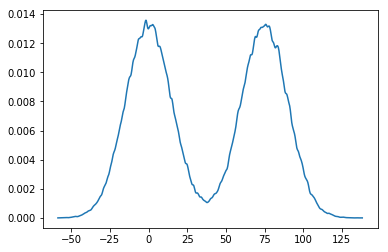

In [19]:
plt.plot(x, y)
plt.show()

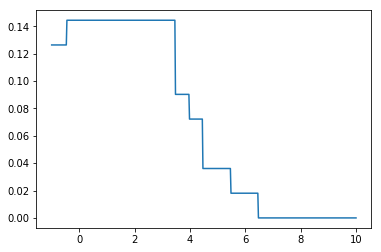

In [20]:
kde = KDEpy.KDE('box', bw = 2)
kde.fit(np.array([0, 0, 0,0.5, 1, 2, 3, 1]))
x = np.linspace(-1,10, num=500)#np.array([0])
y = kde.evaluate_naive(x)
#assert np.allclose(y, np.array([1.]))

plt.plot(x, y)
plt.show()

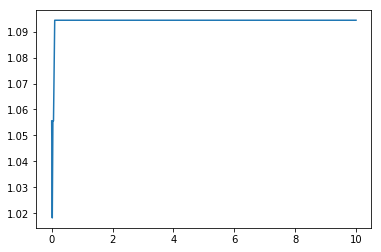

In [21]:
kde = KDEpy.KDE('box', bw = 2)
kde.fit(np.log(np.array([0, 0, 0,0.5, 1, 2, 3, 1]) + 0.0001))
x = np.linspace(0,10, num=500)#np.array([0])
y = np.exp(kde.evaluate_naive(np.log(x + 0.0001)))
#assert np.allclose(y, np.array([1.]))

plt.plot(x, y)
plt.show()

## Tests against scipy

In [22]:
from scipy import stats
from scipy.stats import gaussian_kde
import numpy as np

In [23]:
bw = 0.01
n = 3


data = np.array([0, 0.1, 1])
x = np.linspace(-1, 1, n)
density_estimate = gaussian_kde(dataset = data, bw_method = bw/np.asarray(data).std(ddof=1))
y = density_estimate.evaluate(x)
y

array([ 0.        , 13.29807601, 13.29807601])

In [24]:
from KDEpy import KDE

In [25]:
KDE(kernel='gaussian', bw=bw).fit(data).evaluate_naive(x)

array([ 0.        , 13.29807601, 13.29807601])

In [26]:
gaussian = KDE._available_kernels['gaussian']

In [27]:
x = np.linspace(0, gaussian.var*10, num = 3)

gaussian(x)

array([3.98942280e-01, 1.48671951e-06, 7.69459863e-23])

In [28]:
i = np.searchsorted(gaussian(x), 10e-10, side='left', sorter=np.arange(len(x))[::-1])
i

1

In [29]:
np.insert(gaussian(x), i+1, 10e-10)

array([3.98942280e-01, 1.48671951e-06, 1.00000000e-09, 7.69459863e-23])

In [30]:
np.diff(np.insert(gaussian(x), i+1, 10e-10))

array([-3.98940794e-01, -1.48571951e-06, -1.00000000e-09])

------------

In [31]:
tolerance = 10e-10
x_samples = np.linspace(-gaussian.var*10, 0, num = 50000)
sampled_func = gaussian(x_samples) - tolerance

to_search = sampled_func
#to_search

In [32]:
i = np.searchsorted(to_search, 0, side='right')
print(i)
print(x_samples[i])
print(gaussian(x_samples[i-1]))

18532
-6.29352587051741
[9.98835291e-10]


In [33]:
inserted = np.insert(to_search, i, 0)
inserted

array([-1.00000000e-09, -1.00000000e-09, -1.00000000e-09, ...,
        3.98942247e-01,  3.98942271e-01,  3.98942279e-01])

In [34]:
np.all(np.diff(inserted) >= 0)

True

In [35]:
np.argsort(np.array([10,  8, 6, 2]))

array([3, 2, 1, 0])